# This hands-on shows how to use PCA on Image (generally large dimensional) data and train a classifier on the lower dimensional representation of the images.
# The hands-on also shows how to reduce the noise in the data by selecting the target explained variance

# We will build a SV classifier firtst with all the 64 dimensions
# Use grid search for HYP tuning
# then do a PCA and reduce the dimensions from 64 to 20
# compare the prediction accuracies and the time taken to train the model


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from time import time

In [2]:
digits = load_digits()
digits.data.shape

(1797, 64)

data consists of 8×8 pixel images, meaning that they are 64-dimensional

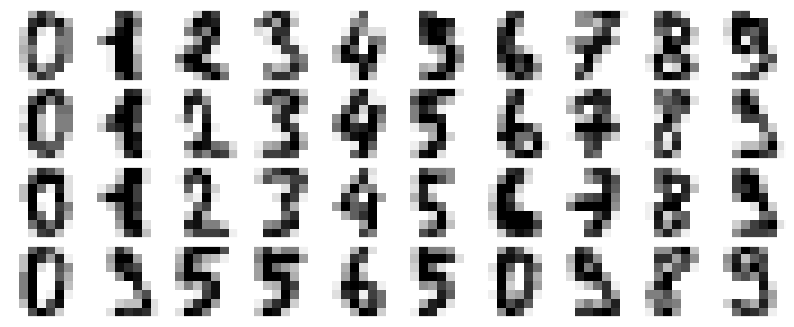

In [33]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)
plt.show()

In [4]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

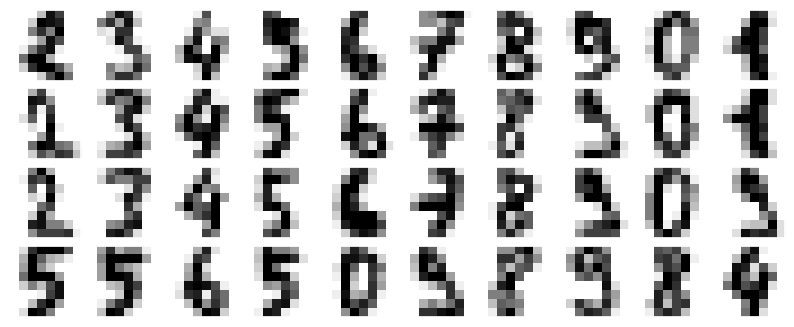

In [43]:
plot_digits(digits.data[2:])
plt.show()

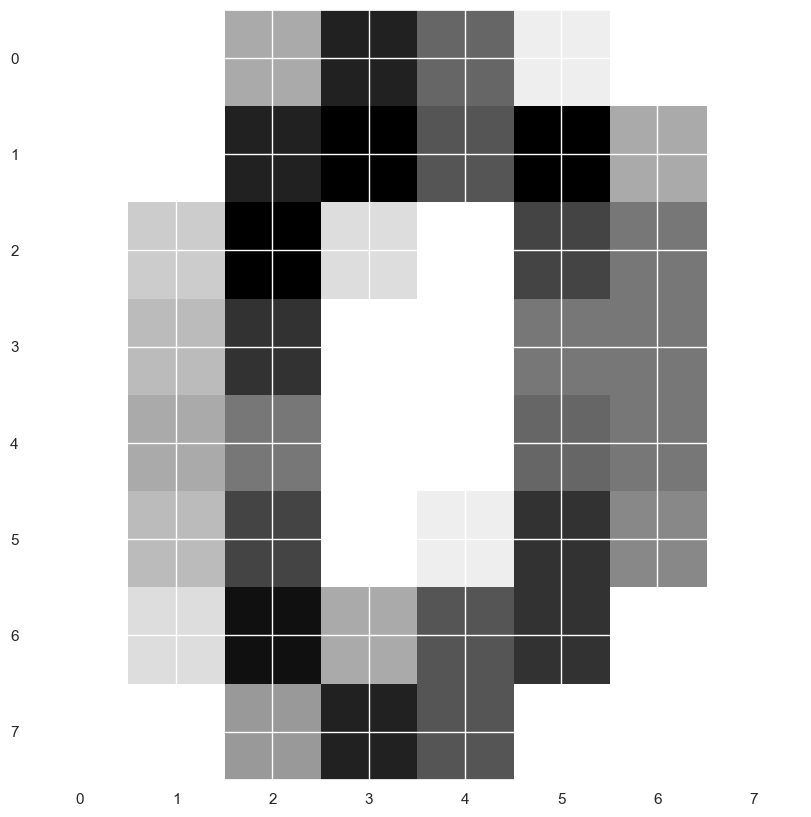

In [54]:
plt.imshow(digits.data[0].reshape(8, 8), cmap='binary')
plt.show()

In [55]:
X = digits.data
y = digits.target
X[0].reshape(8, 8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [44]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [56]:
t0 = time()
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'),
                   param_grid, cv=5)
clf = clf.fit(X_train, y_train)
print("done in %0.3fs" % (time() - t0))
print("Best estimator found by grid search:")
print(clf.best_estimator_)

done in 22.939s
Best estimator found by grid search:
SVC(C=1000.0, class_weight='balanced', gamma=0.001)


In [9]:
t0 = time()
yfit = clf.predict(X_test)
print("inference time %0.3fs" % (time() - t0))

inference time 0.078s


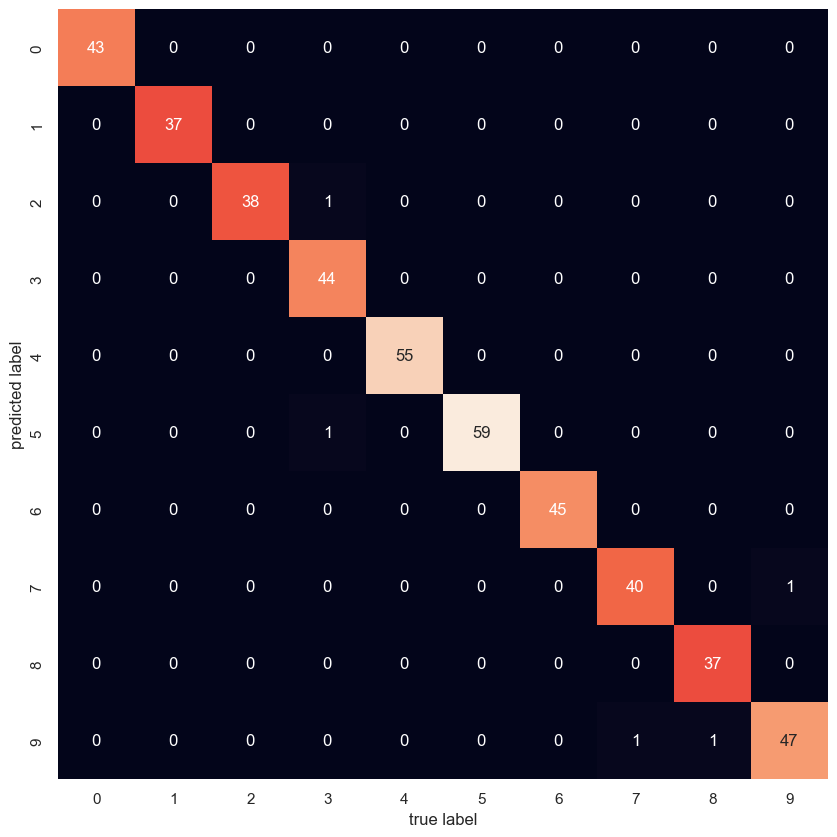

In [57]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

In [11]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, yfit)

0.9911111111111112

In [12]:
pca = PCA(min(digits.data.shape))
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 64)


In [14]:
np.cumsum(pca.explained_variance_ratio_)

array([0.14890594, 0.28509365, 0.40303959, 0.48713938, 0.54496353,
       0.59413263, 0.6372925 , 0.67390623, 0.70743871, 0.73822677,
       0.76195018, 0.78467714, 0.80289578, 0.82063433, 0.83530534,
       0.84940249, 0.86258838, 0.87506976, 0.88524694, 0.89430312,
       0.9031985 , 0.91116973, 0.91884467, 0.9260737 , 0.93303259,
       0.9389934 , 0.94474955, 0.94990113, 0.95479652, 0.9590854 ,
       0.96282146, 0.96635421, 0.96972105, 0.97300135, 0.97608455,
       0.97902234, 0.98158823, 0.98386565, 0.98608843, 0.98820273,
       0.99010182, 0.99168835, 0.99319995, 0.99460574, 0.99577196,
       0.99684689, 0.99781094, 0.99858557, 0.99914278, 0.99954711,
       0.99975703, 0.99983951, 0.99989203, 0.99994255, 0.99997555,
       0.99998798, 0.99999503, 0.99999804, 0.99999911, 0.99999966,
       1.        , 1.        , 1.        , 1.        ])

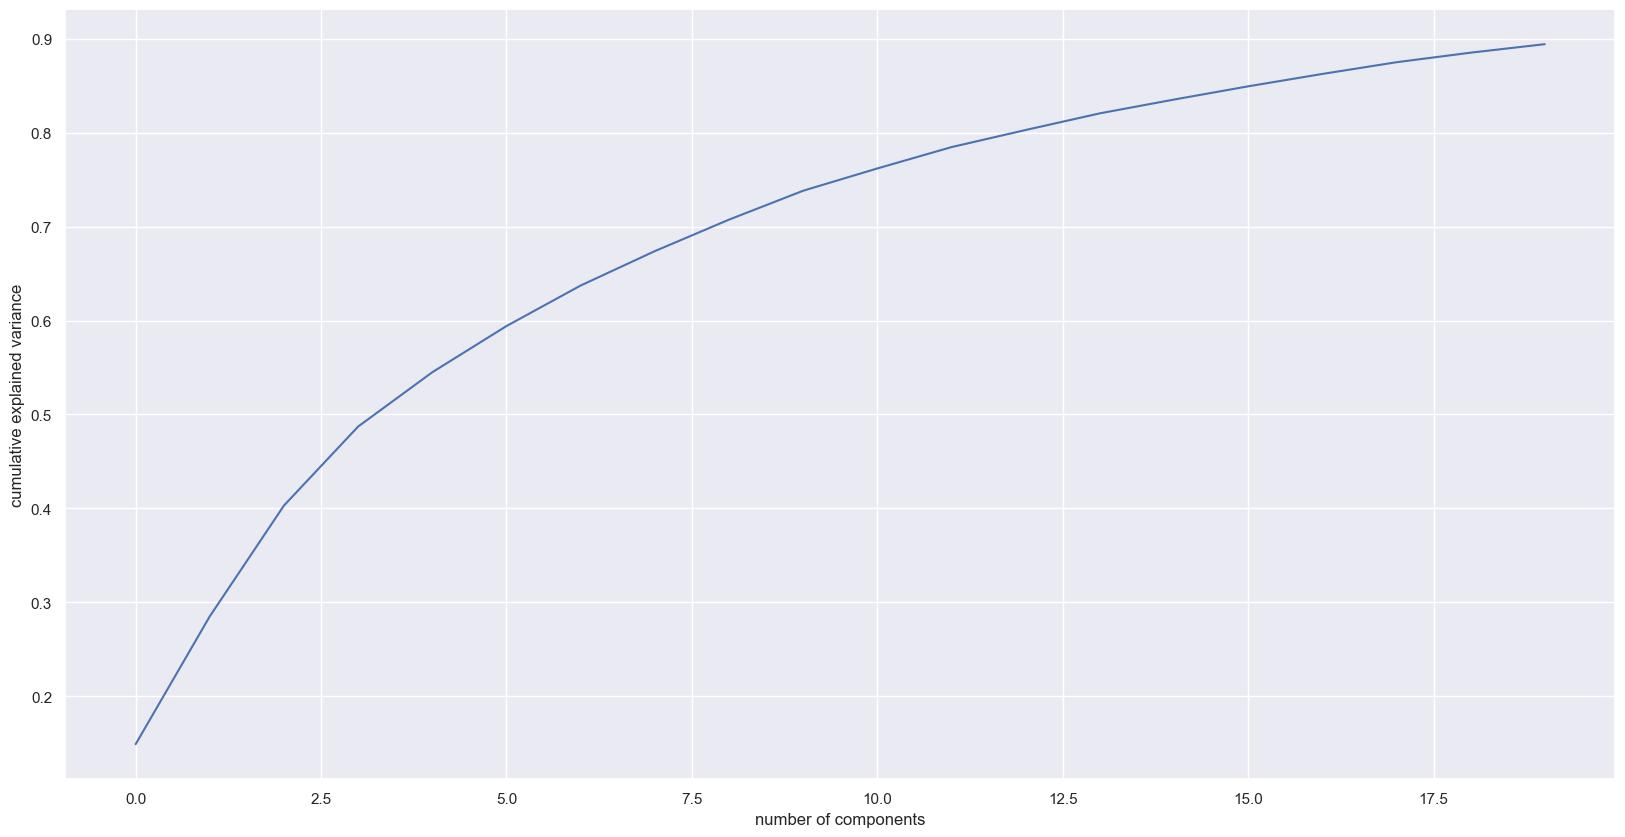

In [58]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.show()

In [59]:
pca = PCA(20)
projected = pca.fit_transform(digits.data)

X_train, X_test, y_train, y_test = train_test_split(projected, digits.target,test_size=0.25,random_state=42)

In [60]:
x = np.arange(1, 21)

In [61]:
pca.explained_variance_ratio_

array([0.14890594, 0.13618771, 0.11794594, 0.08409979, 0.05782415,
       0.0491691 , 0.04315987, 0.03661373, 0.03353248, 0.03078806,
       0.02372341, 0.02272697, 0.01821863, 0.01773855, 0.01467101,
       0.01409716, 0.01318589, 0.01248138, 0.01017718, 0.00905617])

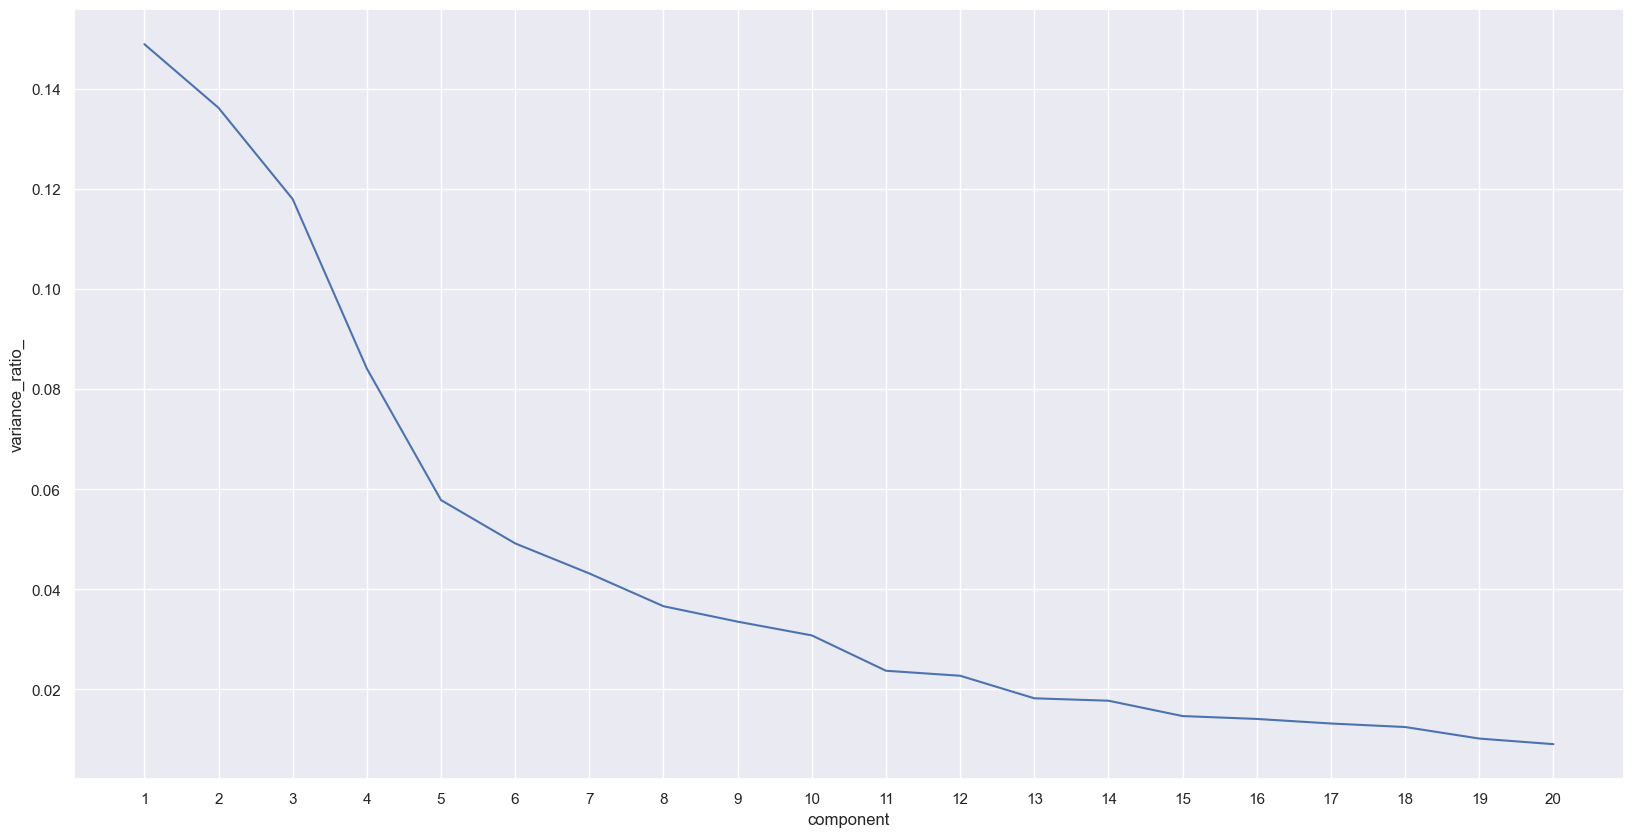

In [62]:
plt.plot(x,pca.explained_variance_ratio_)
plt.xticks(np.arange(1, 21, step=1))
# Add a title and labels (optional)
plt.xlabel("component")
plt.ylabel("variance_ratio_")

# Display the plot
plt.show()

In [63]:
np.cumsum(pca.explained_variance_ratio_)

array([0.14890594, 0.28509365, 0.40303959, 0.48713938, 0.54496353,
       0.59413263, 0.6372925 , 0.67390623, 0.70743871, 0.73822677,
       0.76195018, 0.78467714, 0.80289578, 0.82063433, 0.83530534,
       0.84940249, 0.86258838, 0.87506976, 0.88524694, 0.89430312])

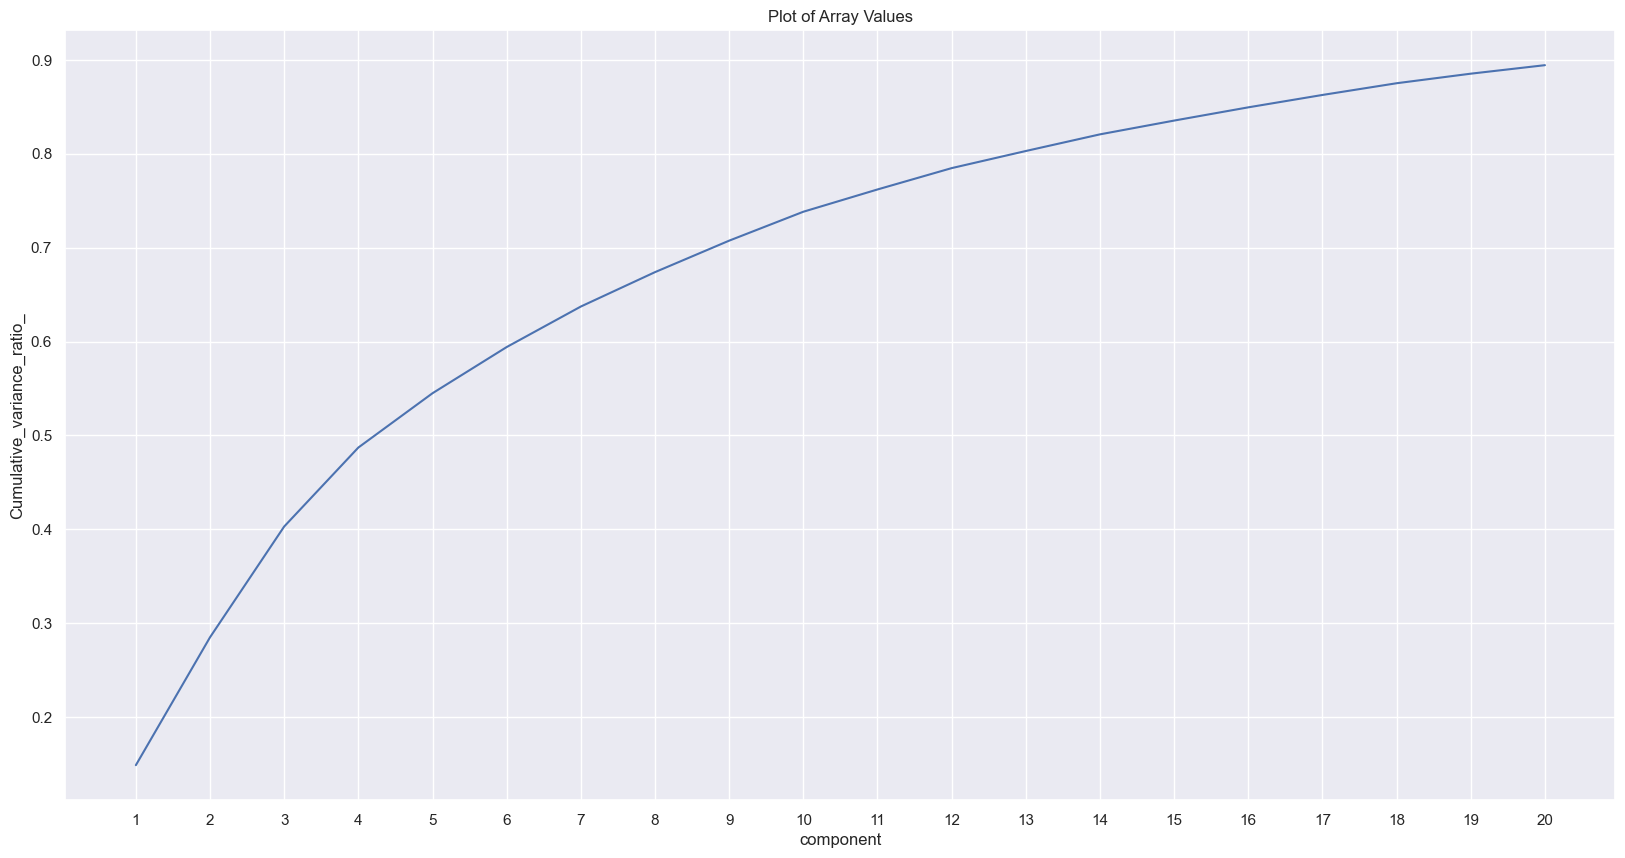

In [64]:
plt.plot(x,np.cumsum(pca.explained_variance_ratio_))
plt.xticks(np.arange(1, 21, step=1))
# Add a title and labels (optional)
plt.title("Plot of Array Values")
plt.xlabel("component")
plt.ylabel("Cumulative_variance_ratio_")

# Display the plot
plt.show()

In [66]:
t0 = time()
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf_PCA = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'),
                   param_grid, cv=5)
clf_PCA = clf_PCA.fit(X_train, y_train)
print("done in %0.3fs" % (time() - t0))
print("Best estimator found by grid search:")
print(clf_PCA.best_estimator_)

done in 17.445s
Best estimator found by grid search:
SVC(C=1000.0, class_weight='balanced', gamma=0.001)


In [67]:
15/26

0.5769230769230769

In [68]:
t0 = time()
yfit = clf_PCA.predict(X_test)
print("inference time with PCA %0.3fs" % (time() - t0))

inference time with PCA 0.039s


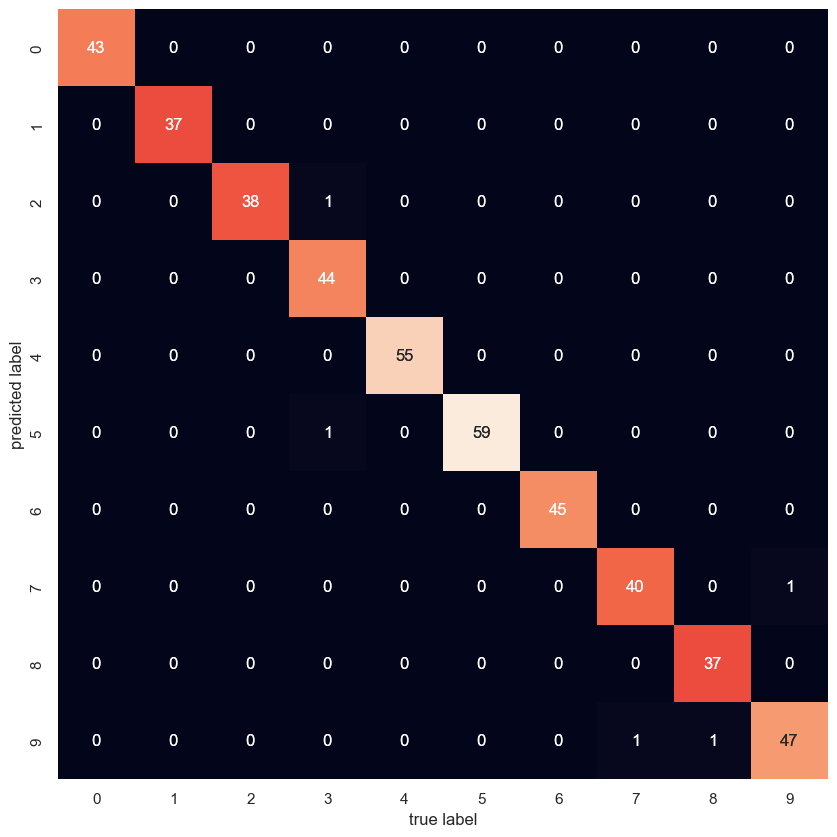

In [70]:
mat = confusion_matrix(y_test, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.rcParams["figure.figsize"] = (20,10)
plt.show()

In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, yfit)

0.9888888888888889

# PCA for Noise Filtering

Add random noise to the digits data. μ = mean of (digits.data), σ=+-3

X∼N(μ,σ2)

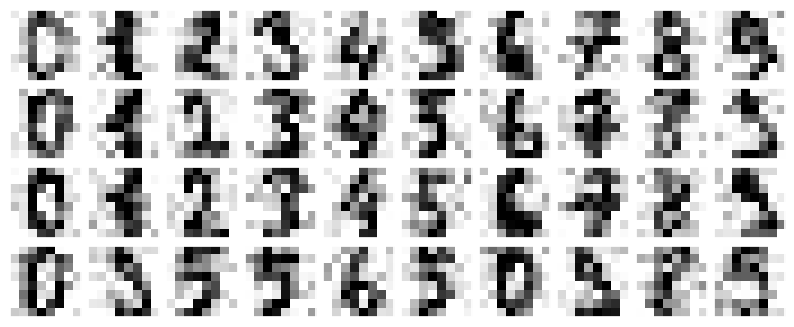

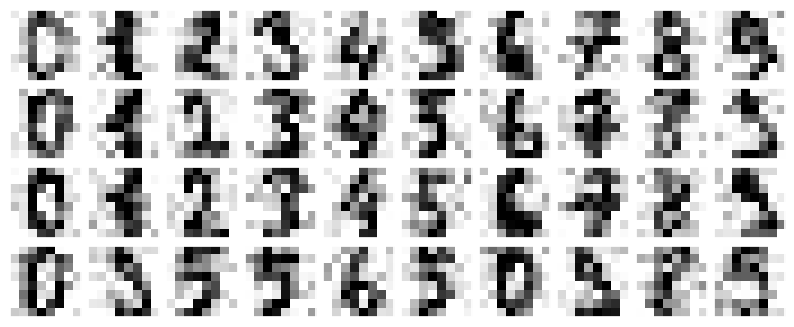

In [73]:
np.random.seed(42)
noisy = np.random.normal(digits.data,scale= 3)
plot_digits(noisy)
plt.show()

In [74]:
pca = PCA(0.6).fit(noisy)
pca.n_components_

np.int64(13)

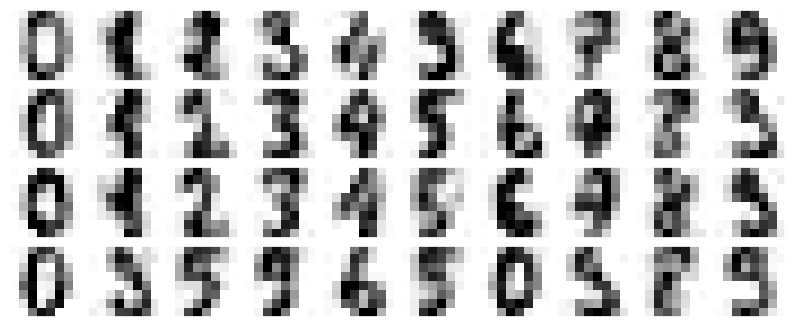

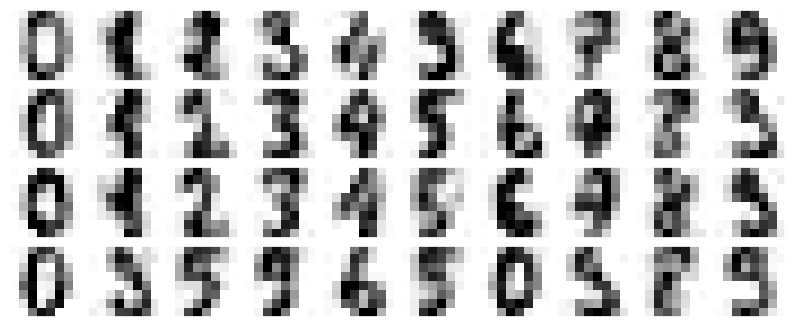

In [76]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)
plt.show()

### Inverse transformation
X̂ = T × Vᵀ + μ

X̂ = reconstructed data (n_samples × n_features)

T = PC scores from transform() (n_samples × k_components)

V = pca.components_.T (k_components × n_features)

μ = pca.mean_ (1 × n_features, broadcasted)

In [ ]:
pca = PCA(0.8).fit(noisy)
pca.n_components_

In [ ]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

In [ ]:
components.shape

In [ ]:
filtered.shape